## Step 1: Business Understanding

Goal:
Predict whether a customer will subscribe to a term deposit (deposit = yes/no)
so the bank can prioritize which customers to call.

Constraints:
- Prediction must be made **before calling**
- Call duration is not known beforehand → potential data leakage

Target variable:
- deposit (yes / no)

In [1]:
import warnings
warnings.filterwarnings("ignore")

### STEP 2 — Dataset Overview

In [2]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("data/bank.csv")

# Basic shape
df.shape

(11162, 17)

In [3]:
# First look at data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# Column names
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [5]:
# Data types & non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
# Statistical summary (numerical)
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Step 3 — Data Quality Checks

In [7]:
# Check missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
# Count 'unknown' values per column
(df == "unknown").sum()

age             0
job            70
marital         0
education     497
default         0
balance         0
housing         0
loan            0
contact      2346
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     8326
deposit         0
dtype: int64

In [9]:
# Check duplicates
df.duplicated().sum()

np.int64(0)

In [10]:
# Age sanity check
df['age'].describe()

count    11162.000000
mean        41.231948
std         11.913369
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64

In [11]:
# Campaign related columns
df[['campaign', 'pdays', 'previous']].describe()

,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000
mean,2.508421,51.330407,0.832557
std,2.722077,108.758282,2.292007
min,1.000000,-1.000000,0.000000
25%,1.000000,-1.000000,0.000000
50%,2.000000,-1.000000,0.000000
75%,3.000000,20.750000,1.000000
max,63.000000,854.000000,58.000000


In [12]:
# Balance check
df['balance'].describe()

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

### STEP 4 — Target Variable Analysis

In [13]:
# Target distribution
df['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

In [14]:
# Target distribution (percentage)
df['deposit'].value_counts(normalize=True) * 100

deposit
no     52.616019
yes    47.383981
Name: proportion, dtype: float64

### Visualization

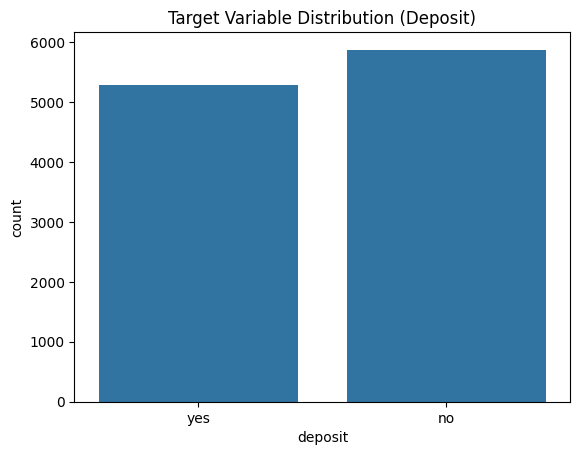

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='deposit', data=df)
plt.title("Target Variable Distribution (Deposit)")
plt.show()

### STEP 5 — UNIVARIATE ANALYSIS

### 5.1 Separate Numerical & Categorical Columns

In [16]:
num_cols = df.select_dtypes(include=['int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

num_cols, cat_cols

(Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object'),
 Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
        'month', 'poutcome', 'deposit'],
       dtype='object'))

### 5.2 Numerical Features vs Target
We will plot distributions split by deposit

In [17]:
# helper setup
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

**Age vs Deposit**

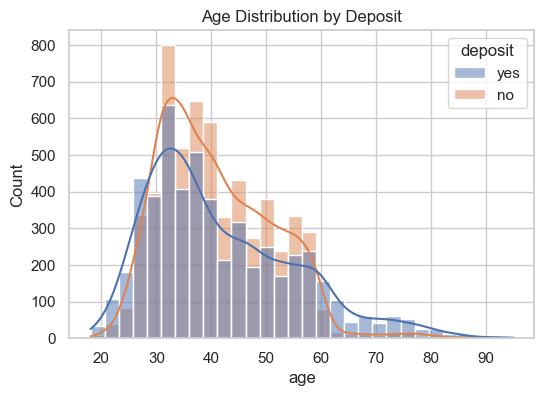

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='age', hue='deposit', bins=30, kde=True)
plt.title("Age Distribution by Deposit")
plt.show()

**Balance vs Deposit**

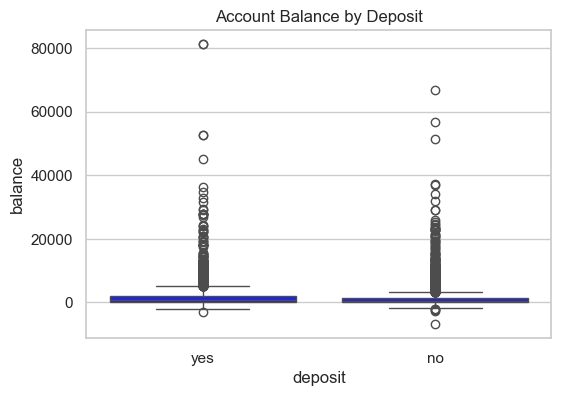

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='deposit', y='balance', color = 'blue')
plt.title("Account Balance by Deposit")
plt.show()

**Campaign vs Deposit**

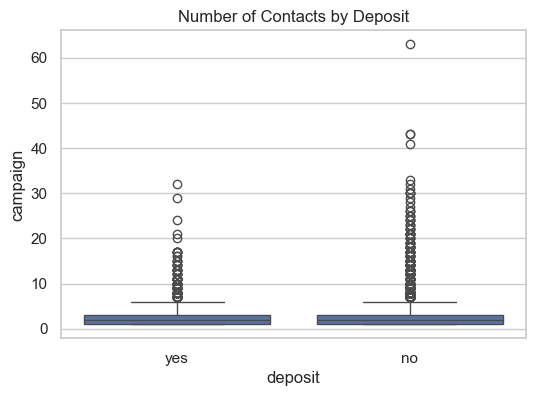

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='deposit', y='campaign')
plt.title("Number of Contacts by Deposit")
plt.show()

**Duration**

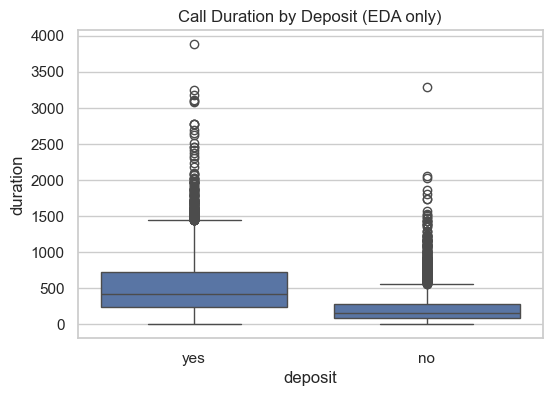

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='deposit', y='duration')
plt.title("Call Duration by Deposit (EDA only)")
plt.show()

This duration plot above visually proves data leakage, we will drop this below.

**Dropping duration**

In [22]:
DF = df.copy()
df = df.drop(columns = ['duration'])

In [23]:
#recheck
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,2,172,5,failure,no


### 5.3 Categorical Features vs Target

In [24]:
#Encoding deposit
df['deposit_encoded'] = df['deposit'].map({'no':0,'yes':1})
# helper function
def plot_conversion_rate(col):
    rate = df.groupby(col)['deposit_encoded'].mean().sort_values(ascending=False)
    plt.figure(figsize=(8,4))
    rate.plot(kind='bar')
    plt.ylabel("Deposit YES Rate")
    plt.title(f"Conversion Rate by {col}")
    plt.show()

**Job vs Deposit**

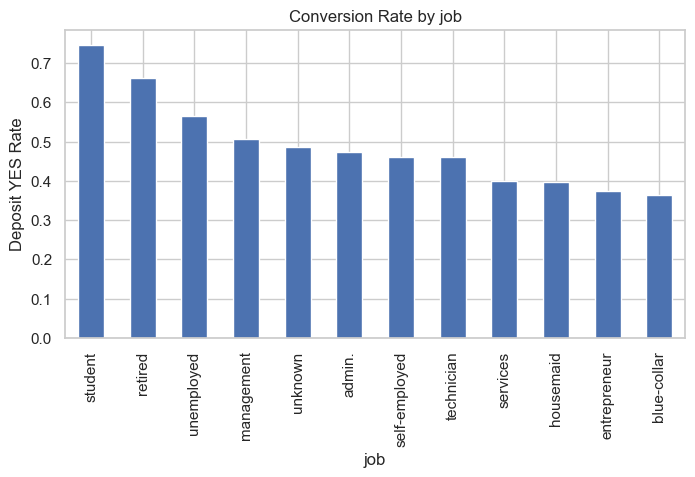

In [25]:
plot_conversion_rate('job')

Conclusion: Job category shows strong variation in deposit conversion rates. Students and retired customers exhibit the highest likelihood of subscription, while blue-collar, services, and entrepreneurial segments show consistently lower conversion.

**Education vs Deposit**

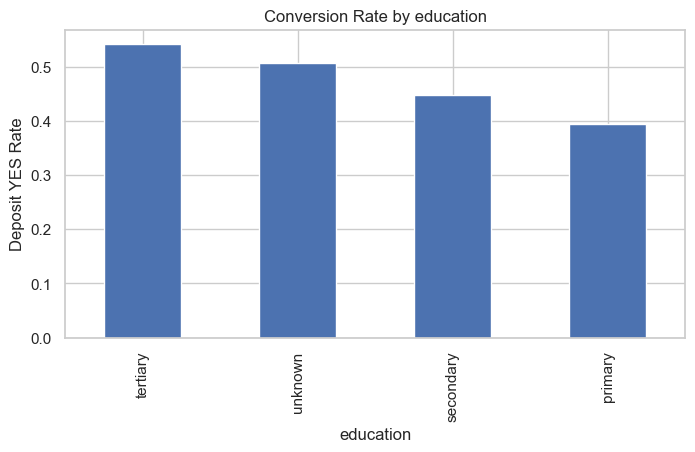

In [26]:
plot_conversion_rate('education')

Conclusion: Higher education levels correlate with increased deposit subscription rates, suggesting financial literacy or income stability plays a role in investment decisions.

**Housing Loan vs Deposit**

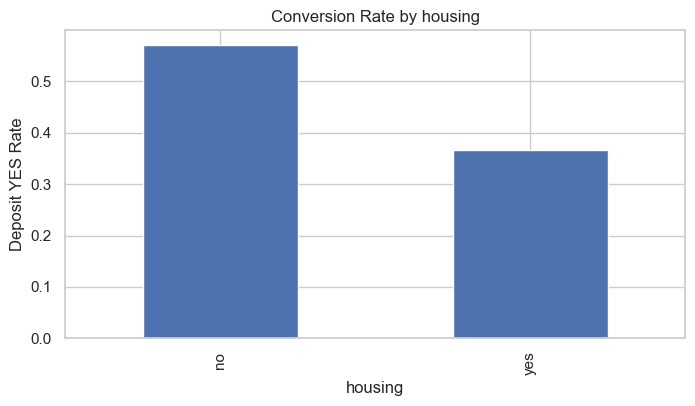

In [27]:
plot_conversion_rate('housing')

Conclusion: Customers without existing housing or personal loans are significantly more likely to subscribe to a term deposit, indicating that existing debt reduces willingness or capacity to invest.

**Personal Loan vs Deposit**

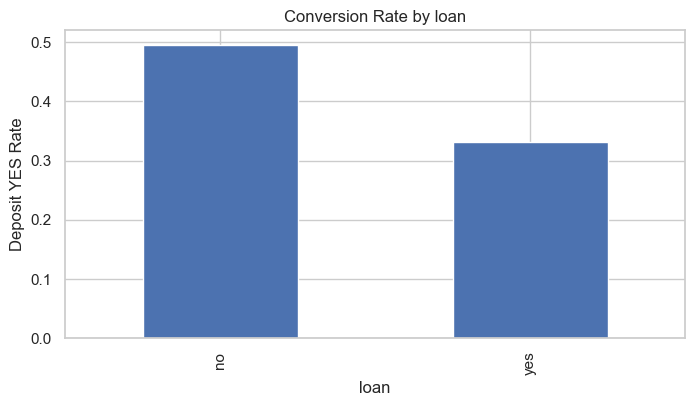

In [28]:
plot_conversion_rate('loan')

**Contact Type vs Deposit**

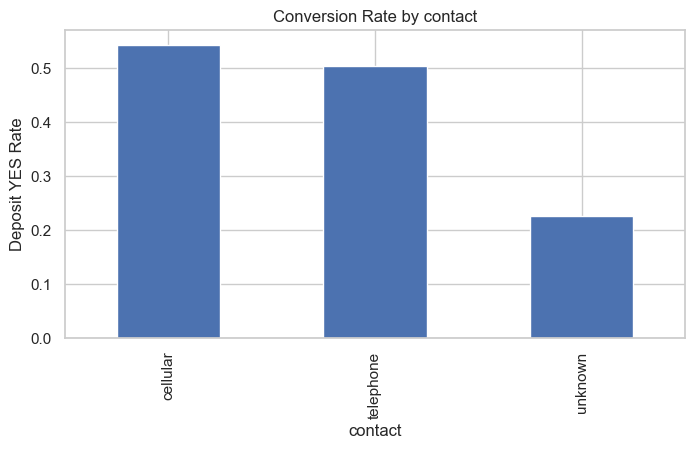

In [29]:
plot_conversion_rate('contact')


Conclusion: Customers contacted via cellular or telephone show substantially higher conversion than those with unknown contact methods, suggesting targeted outreach is more effective than generic or poorly recorded contact attempts.

**Month vs Deposit (seasonality)**

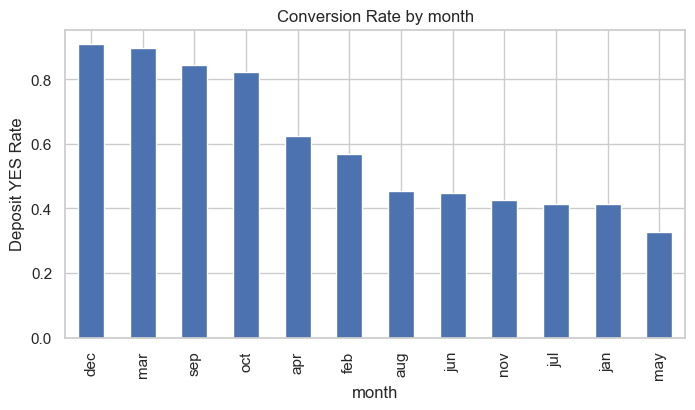

In [30]:
plot_conversion_rate('month')

Conclusion: Deposit subscription rates vary drastically by month, with end-of-year and quarter-start months (Dec, Mar, Sep, Oct) showing exceptionally high conversion rates, while mid-year months (May, Jan) perform poorly.

**Previous Campaign Outcome**

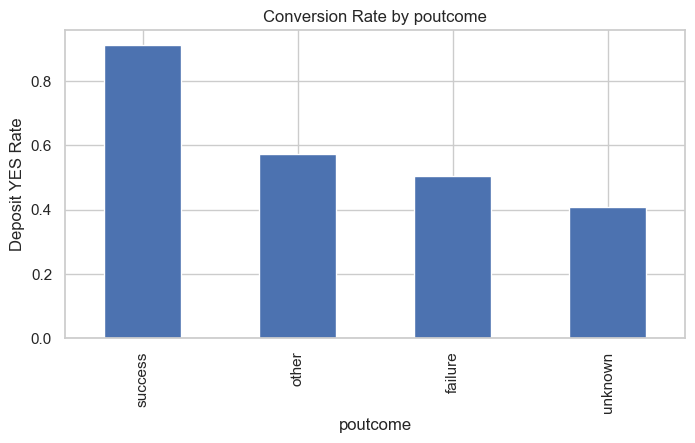

In [31]:
plot_conversion_rate('poutcome')

Conclusion: Previous campaign outcome is the most predictive categorical feature. Customers who previously subscribed show an extremely high likelihood of subscribing again, while customers with no prior contact history convert at lower rates.

### Encoding and Scaling

In [32]:
#Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

# Features & target
X = df.drop(columns=['deposit', 'deposit_encoded'])  # FEATURES ONLY
y = df['deposit_encoded']  # TARGET

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
binary_cols = ['default', 'housing', 'loan']

one_hot_cols = [
    'job', 'marital', 'education',
    'contact', 'month', 'poutcome'
]

num_cols = [
    'age', 'balance', 'day',
    'campaign', 'pdays', 'previous'
]

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('bin', OneHotEncoder(drop='if_binary'), binary_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), one_hot_cols)
    ]
)

In [35]:
X_processed = preprocessor.fit_transform(X)
print(X_processed.shape)

(11162, 41)


### Constructing ML Models

**Logistic Regression Model**

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
log_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        max_iter=3000,
        solver='lbfgs',
        random_state=42
    ))
])

log_model.fit(X_train, y_train)

y_pred_proba = log_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Logistic Regression ROC AUC:", roc_auc)

Logistic Regression ROC AUC: 0.7579753046695894


**Random Forest Model**

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)

y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Random Forest ROC AUC:", roc_auc)

Random Forest ROC AUC: 0.7801608816313398


**XGboost Model**

In [45]:
from xgboost import XGBClassifier
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    ))
])

xgb_model.fit(X_train, y_train)

y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("XGBoost ROC AUC:", roc_auc)

XGBoost ROC AUC: 0.794737561838877


### Hyperparameter Tuning

**Logistic Regression HyperParameter Tuning**

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [47]:
log_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(
        max_iter=3000,
        random_state=42
    ))
])

In [48]:
param_grid = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear', 'saga'],
    'model__class_weight': [None, 'balanced']
}

In [49]:
log_search = GridSearchCV(
    estimator=log_pipe,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=2
)

log_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'model__C': [0.01, 0.1, ...], 'model__class_weight': [None, 'balanced'], 'model__penalty': ['l1', 'l2'], 'model__solver': ['liblinear', 'saga']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time 

In [43]:
best_log = log_search.best_estimator_

y_pred_proba = best_log.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Best Logistic Regression ROC AUC:", roc_auc)
print("Best Params:", log_search.best_params_)

Best Logistic Regression ROC AUC: 0.7604110525680731
Best Params: {'model__C': 0.1, 'model__class_weight': None, 'model__penalty': 'l1', 'model__solver': 'saga'}


### Stacking

In [50]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [55]:
stack_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('stack', StackingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=3000)),
            ('rf', RandomForestClassifier(n_estimators=400, random_state=42)),
            ('xgb', XGBClassifier(n_estimators=250, learning_rate=0.05, max_depth=5,
                                  subsample=0.8, colsample_bytree=0.8, tree_method="hist",
                                  eval_metric="logloss", random_state=42))
        ],
        final_estimator=LogisticRegression(max_iter=3000),
        cv=3,
        n_jobs=-1,
        passthrough=True
    ))
])

In [56]:
stack_pipeline.fit(X_train, y_train)
y_pred_proba = stack_pipeline.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Stacking Pipeline ROC AUC:", roc_auc)

Stacking Pipeline ROC AUC: 0.7959530225636487


In [57]:
import joblib
joblib.dump(stack_pipeline, 'stacked_bank_model.pkl')

['stacked_bank_model.pkl']

In [59]:
pip install Faker

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   -------------------------- ------------- 1.3/2.0 MB 3.5 MB/s eta 0:00:01
   ------------------------------------- -- 1.8/2.0 MB 3.8 MB/s eta 0:00:01
   ------------------------------------- -- 1.8/2.0 MB 3.8 MB/s eta 0:00:01
   ------------------------------------- -- 1.8/2.0 MB 3.8 MB/s eta 0:00:01
   ------------------------------------- -- 1.8/2.0 MB 3.8 MB/s eta 0:00:01
   ------------------------------------- -- 1.8/2.0 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
import pandas as pd
import numpy as np
from faker import Faker
import random

In [61]:
fake = Faker()
np.random.seed(42)
random.seed(42)

n_rows = 10000

# Numeric features
age = np.random.randint(18, 95, size=n_rows)
balance = np.random.randint(-2000, 100000, size=n_rows)
day = np.random.randint(1, 32, size=n_rows)
campaign = np.random.randint(1, 50, size=n_rows)
pdays = np.random.randint(-1, 999, size=n_rows)  # -1 = never contacted
previous = np.random.randint(0, 10, size=n_rows)

# Binary columns
default = np.random.choice(['yes', 'no'], size=n_rows, p=[0.03, 0.97])
housing = np.random.choice(['yes', 'no'], size=n_rows, p=[0.55, 0.45])
loan = np.random.choice(['yes', 'no'], size=n_rows, p=[0.15, 0.85])

# Categorical columns
job_list = ['admin.', 'technician', 'services', 'management', 'retired', 'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'self-employed', 'student', 'unknown']
marital_list = ['married', 'single', 'divorced']
education_list = ['primary', 'secondary', 'tertiary', 'unknown']
contact_list = ['cellular', 'telephone']
month_list = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
poutcome_list = ['unknown', 'failure', 'success', 'other']

job = np.random.choice(job_list, size=n_rows)
marital = np.random.choice(marital_list, size=n_rows)
education = np.random.choice(education_list, size=n_rows)
contact = np.random.choice(contact_list, size=n_rows)
month = np.random.choice(month_list, size=n_rows)
poutcome = np.random.choice(poutcome_list, size=n_rows)

# Target column (deposit) - just random for demo
deposit = np.random.choice(['yes', 'no'], size=n_rows, p=[0.12, 0.88])
deposit_encoded = np.where(deposit=='yes', 1, 0)

# Combine into DataFrame
synthetic_df = pd.DataFrame({
    'age': age,
    'balance': balance,
    'day': day,
    'campaign': campaign,
    'pdays': pdays,
    'previous': previous,
    'default': default,
    'housing': housing,
    'loan': loan,
    'job': job,
    'marital': marital,
    'education': education,
    'contact': contact,
    'month': month,
    'poutcome': poutcome,
    'deposit': deposit,
    'deposit_encoded': deposit_encoded
})

synthetic_df.head()

,age,balance,day,campaign,pdays,previous,default,housing,loan,job,marital,education,contact,month,poutcome,deposit,deposit_encoded
0,69,26555,14,6,890,5,no,no,no,admin.,divorced,primary,cellular,jan,success,no,0
1,32,69934,29,45,605,3,no,no,no,housemaid,divorced,tertiary,telephone,aug,other,no,0
2,89,70788,4,47,153,5,no,no,no,services,divorced,tertiary,telephone,nov,success,no,0
3,78,75257,7,27,204,5,no,yes,no,retired,married,secondary,cellular,apr,success,no,0
4,38,15939,7,7,113,3,no,yes,no,unemployed,married,unknown,cellular,oct,failure,yes,1


In [63]:
synthetic_df.to_csv('synthetic_bank_data_10k.csv', index=False)

In [66]:
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']